In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
summary_statistics = market_data_df.describe()

# Display summary statistics
display(summary_statistics)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Load the data into a Pandas DataFrame
file_path = 'Resources/crypto_market_data.csv'  
market_data_df = pd.read_csv(file_path, index_col='coin_id')

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data (excluding the index)
scaled_data = scaler.fit_transform(market_data_df)

# Convert the scaled data back into a DataFrame, maintaining the index
scaled_market_data_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

# Display the first 10 rows of the scaled DataFrame
display(scaled_market_data_df.head(10))

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [5]:
import matplotlib.pyplot as plt

# Create a list with the number of k-values to try
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_market_data_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

# # Plot the Elbow curve
# plt.figure(figsize=(8, 6))
# plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal k')
# plt.show()

    k     inertia
0   1  287.000000
1   2  212.123342
2   3  170.193571
3   4   79.022435
4   5   71.097914
5   6   66.108827
6   7   54.488123
7   8   43.224693
8   9   32.860884
9  10   28.404885


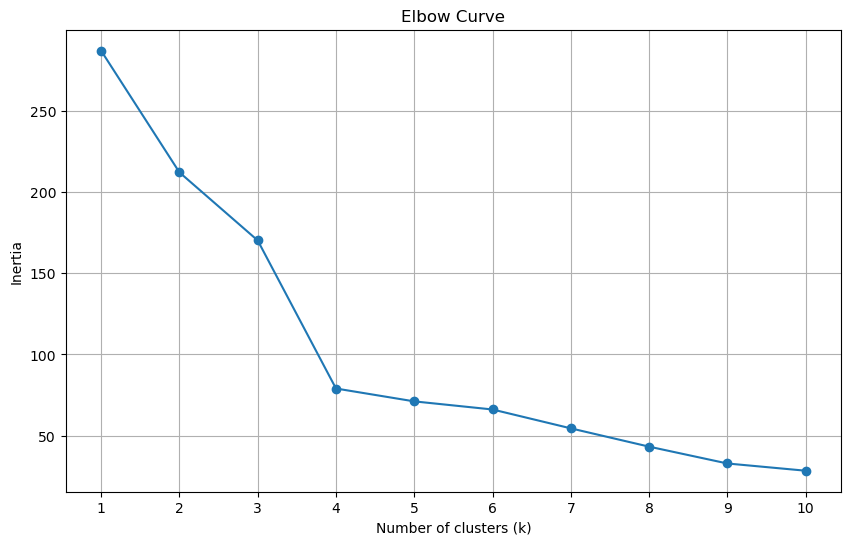

In [6]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** THE BEST K VALUE HERE WILL BE 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [13]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data (excluding the index)
scaled_data = scaler.fit_transform(market_data_df)

# Convert the scaled data back into a DataFrame, maintaining the index
scaled_market_data_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

# Initialize the K-Means model using the best value for k (assuming k=4 from the Elbow curve)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the K-Means model using the scaled data
kmeans.fit(scaled_market_data_df)

# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_market_data_df)

# Print the cluster centers
print("Cluster Centers:")
print(kmeans_best.cluster_centers_)

# View the resulting array of cluster values
print(clusters)

# Create a copy of the DataFrame
market_data_with_clusters = scaled_market_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_with_clusters['Cluster'] = clusters

# Display sample data
display(market_data_with_clusters.head(10))

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [14]:
# Create a copy of the DataFrame

market_data_copy = market_data_df.copy()



### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.

pca = PCA(n_components=3)

# Use the PCA model with fit_transform on the original scaled DataFrame
pca_data = pca.fit_transform(scaled_data)

# Convert the PCA data back into a DataFrame, maintaining the index
pca_df = pd.DataFrame(pca_data, index=market_data_df.index, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


just below this markdown is a repeat code for testing

In [21]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.

# View the first five rows of the DataFrame. 

#Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Fit the PCA model to the scaled data and transform the data
pca_data = pca.fit_transform(scaled_data)

# Display the first five rows of the PCA transformed data
#print(pca_data[:5])
# Display the first five rows of the PCA transformed data
#print("PCA Transformed Data (first 5 rows):")
print(f"array({pca_data[:5]})")

array([[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]])


In [23]:
# Use the PCA model with fit_transform on the original scaled DataFrame
pca_data = pca.fit_transform(scaled_data)

# Retrieve the explained variance
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
print("Explained variance by each principal component:")
print(f"PC1: {explained_variance[0]:.4f}")
print(f"PC2: {explained_variance[1]:.4f}")
print(f"PC3: {explained_variance[2]:.4f}")

Explained variance by each principal component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760


#### Answer the following question: ############## ANSWER THE QUESTION HERE *************

**Question:** What is the total explained variance of the three principal components?

**Answer:**  The total explained variance is equal to 0.37+0.34+0.17= 0.895

In [27]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data


# Use the PCA model with fit_transform on the original scaled DataFrame
pca_data = pca.fit_transform(scaled_data)

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, index=market_data_df.index, columns=['PC1', 'PC2', 'PC3'])

# Display sample data
display(pca_df.head(10))


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

# My values are a littel higher than the expated here below of the K- inertia value***********

In [32]:
# Create a list with the number of k-values to try
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using PCA DataFrame
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)



    k     inertia
0   1  256.874086
1   2  182.339530
2   3  140.431833
3   4   49.665497
4   5   42.051901
5   6   31.749005
6   7   28.031869
7   8   19.451747
8   9   13.814082
9  10   10.630648


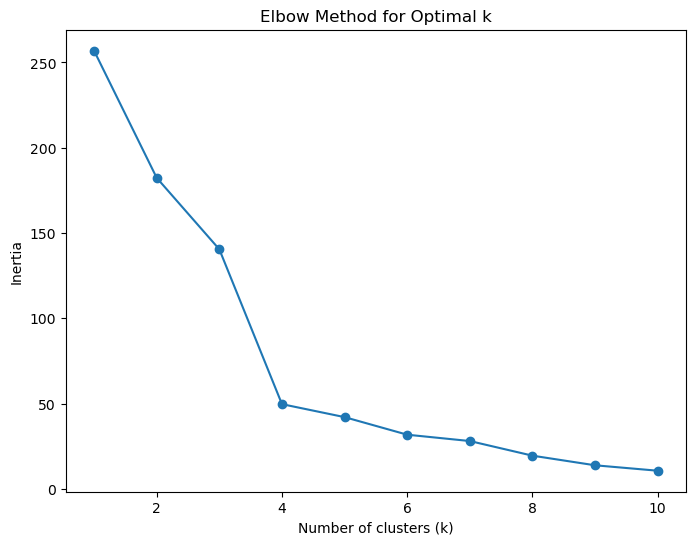

In [31]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the Elbow curve
# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


#### Answer the following questions: ***************** ANSWER THESE QUESTIONS
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** the best value for k here is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** not it does not differ, it is the same k value of 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [35]:

# Use the PCA model with fit_transform on the original scaled DataFrame
pca_data = pca.fit_transform(scaled_data)

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, index=market_data_df.index, columns=['PC1', 'PC2', 'PC3'])

# Initialize the K-Means model using the best value for k (assuming k=4 from previous analysis)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans.predict(pca_df)

# Print the resulting array of cluster values
# print(clusters)

# Create a copy of the DataFrame with the PCA data
pca_df_with_clusters = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_with_clusters['Cluster'] = clusters

# Display sample data
display(pca_df_with_clusters.head())

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [38]:
pip install hvplot

Note: you may need to restart the kernel to use updated packages.


In [44]:
import hvplot.pandas
import hvplot.pandas  


In [47]:
# Create a scatter plot using hvPlot
scatter_plot = pca_df_with_clusters.hvplot.scatter(x='PC1', y='PC2', by='Cluster', colormap='Category10', title='PCA Scatter Plot by Cluster')
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2)

### Determine the Weights of Each Feature on each Principal Component

In [49]:
# Fit the PCA model using the original scaled DataFrame
pca.fit(scaled_data)

# Get the components (weights)
components = pca.components_

# Create a DataFrame with the components
# Use the columns from the original scaled DataFrame as the index
weights_df = pd.DataFrame(components.T, index=market_data_df.columns, columns=['PC1', 'PC2', 'PC3'])

# Display the DataFrame
print(weights_df)

                                   PC1       PC2       PC3
price_change_percentage_24h  -0.416728  0.358162 -0.218795
price_change_percentage_7d   -0.102432  0.227432  0.787670
price_change_percentage_14d  -0.009162  0.540415  0.349534
price_change_percentage_30d   0.191523  0.562182 -0.181744
price_change_percentage_60d   0.320365  0.434040 -0.361377
price_change_percentage_200d  0.594468  0.027735  0.039733
price_change_percentage_1y    0.568379 -0.150789  0.210541


#### Answer the following question: ANSWER THE QUESTION HERE BELOW AND CLEAN THE CODE ABOVE

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:**
PC1 strongest positive influence: price_change_percentage_200d
PC1 strongest negative influence: price_change_percentage_24h
PC2 strongest positive influence: price_change_percentage_30d
PC2 strongest negative influence: price_change_percentage_1y
PC3 strongest positive influence: price_change_percentage_7d
PC3 strongest negative influence: price_change_percentage_60d
    